### K-Nearest Neighbors (K-NN)

Importar librerías

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cargar dataset

In [32]:
df = pd.read_csv('../data/airline_cleaned.csv')
df.head(2)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Customer Type,Type of Travel,Class,satisfaction
0,13.0,460.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,...,4.0,5.0,5.0,25.0,18.0,1,0,1,2,0
1,25.0,235.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,...,1.0,4.0,1.0,1.0,6.0,1,1,0,0,0


Separar las Características (X) y la Etiqueta (y)

+ y = satisfaction (variable a predecir)
* X 

In [33]:
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

#### Dividir el Conjunto de Datos

Se divide el dataset en conjuntos de entrenamiento y prueba:

* X_train, y_train: Se utilizan para entrenar el modelo (80% de los datos).

* X_test, y_test: Se utilizan para evaluar el modelo (20% de los datos).

* test_size=0.20: Indica que el 20% de los datos se reservarán para pruebas.

* random_state=42: Para asegurar que la división sea reproducible.

#### Entrenamiento del Modelo

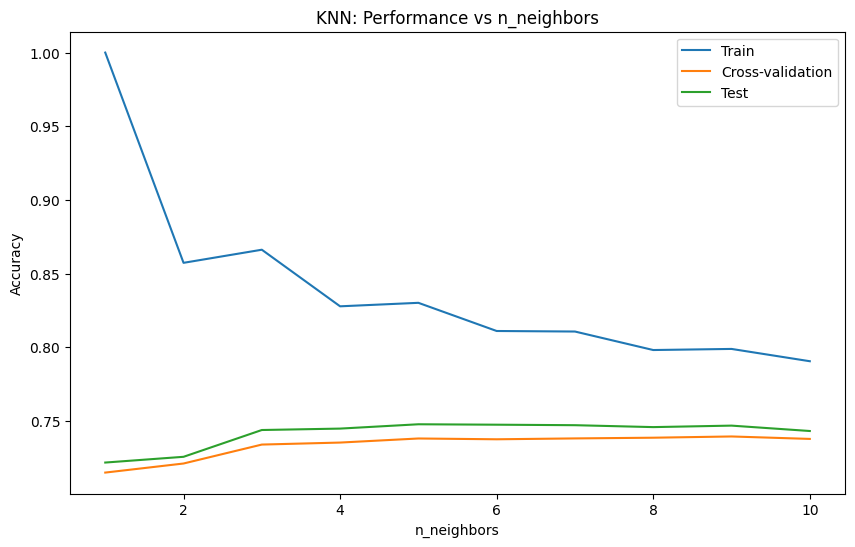

El mejor valor de n_neighbors es: 9
Precisión de validación cruzada con 9 vecinos: 0.7394
Precisión final en el conjunto de prueba: 0.7467


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Lista de valores de n_neighbors para probar
n_neighbors_values = range(1, 11)  # Probamos de 1 a 10 vecinos

# Listas para almacenar los resultados
train_scores = []
cv_scores = []
test_scores = []

for n in n_neighbors_values:
    # Crear y entrenar el modelo
    knn = KNeighborsClassifier(n_neighbors=n)
    
    # Calcular puntuación de entrenamiento
    knn.fit(X_train, y_train)
    train_score = accuracy_score(y_train, knn.predict(X_train))
    train_scores.append(train_score)
    
    # Calcular puntuación de validación cruzada
    cv_score = np.mean(cross_val_score(knn, X_train, y_train, cv=5))
    cv_scores.append(cv_score)
    
    # Calcular puntuación de prueba
    test_score = accuracy_score(y_test, knn.predict(X_test))
    test_scores.append(test_score)

# Encontrar el mejor n_neighbors basado en la validación cruzada
best_n = n_neighbors_values[np.argmax(cv_scores)]

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, train_scores, label='Train')
plt.plot(n_neighbors_values, cv_scores, label='Cross-validation')
plt.plot(n_neighbors_values, test_scores, label='Test')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('KNN: Performance vs n_neighbors')
plt.legend()
plt.show()

print(f"El mejor valor de n_neighbors es: {best_n}")
print(f"Precisión de validación cruzada con {best_n} vecinos: {max(cv_scores):.4f}")

# Entrenar el modelo final con el mejor n_neighbors
best_knn = KNeighborsClassifier(n_neighbors=best_n)
best_knn.fit(X_train, y_train)

# Evaluar en el conjunto de prueba
final_accuracy = accuracy_score(y_test, best_knn.predict(X_test))
print(f"Precisión final en el conjunto de prueba: {final_accuracy:.4f}")


err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))
print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)

# Calcular el overfitting
overfitting = err_test - err_train
print(f"Overfitting: {overfitting:.4f}")

#### Evaluación del Modelo (Predicciones)

Se hacen predicciones sobre el conjunto de prueba usando el modelo entrenado.

* Informe de Clasificación y Matriz de Confusión

    * classification_report: Muestra varias métricas de evaluación, como precisión (accuracy), recall, F1-score, etc.

    * confusion_matrix: Muestra la matriz de confusión, que ayuda a entender cómo de bien el modelo está clasificando las etiquetas correctas frente a las incorrectas.

In [44]:
# Evaluar el modelo
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_knn.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78     11713
           1       0.73      0.66      0.69      9068

    accuracy                           0.75     20781
   macro avg       0.74      0.74      0.74     20781
weighted avg       0.75      0.75      0.74     20781

Confusion Matrix:
 [[9556 2157]
 [3106 5962]]


        Rendimiento general:

        El modelo tiene una precisión global del 75%, lo que indica un rendimiento moderadamente bueno.
        El modelo parece estar ligeramente desequilibrado en su rendimiento entre las dos clases.


        Clase 0 (neutral or dissatisfied):

        Alta tasa de recall (0.82), lo que significa que el modelo es muy bueno identificando correctamente los casos "neutral or dissatisfied".
        Precision más baja (0.75), lo que indica que cuando predice "neutral or dissatisfied", a veces se equivoca.


        Clase 1 (satisfied):

        Peor precision (0.73), lo que significa que cuando el modelo predice "satisfied", suele estar en lo correcto.
        Recall más bajo (0.66), indicando que el modelo pierde bastantes casos de clientes satisfechos, clasificándolos incorrectamente como "neutral or dissatisfied".


        Balance entre clases:

        Hay un ligero desequilibrio en el conjunto de datos (9556 vs 5962), lo que podría estar afectando el rendimiento del modelo.


        Errores del modelo:

        El modelo tiene una tendencia a clasificar erróneamente más casos como "neutral or dissatisfied" cuando en realidad son "satisfied" (3106 FN) que al revés (2157 FP).



#### Curva ROC y AUC

* La curva ROC muestra la relación entre la tasa de verdaderos positivos (sensibilidad) y la tasa de falsos positivos (1 - especificidad) para diferentes umbrales de clasificación.

* Un AUC de 0.5 representaría un clasificador aleatorio (la línea diagonal punteada en el gráfico), mientras que 1.0 sería un clasificador perfecto.

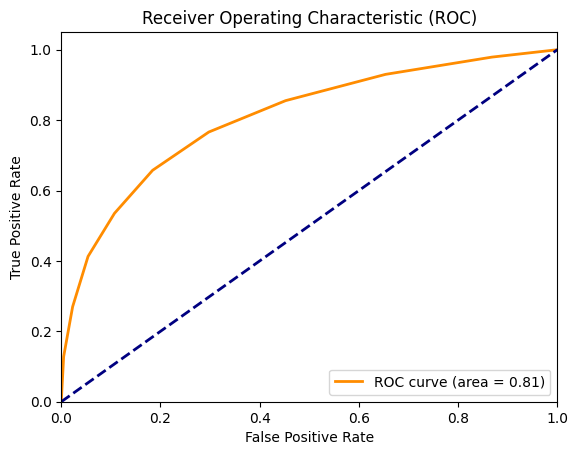

Valores únicos en y_test: [0 1]
Conteo de valores en y_test:
 satisfaction
0    11713
1     9068
Name: count, dtype: int64


In [47]:
from sklearn.metrics import roc_curve, auc

def calculate_roc(best_knn, X_test, y_test):
    
    # Obtener las probabilidades predichas para la clase positiva
    y_pred_proba = best_knn.predict_proba(X_test)[:, 1]
    
    # Calcular la curva ROC
    fpr, tpr, thresholds  = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    return fpr, tpr, roc_auc

# Paso 3: Graficar la curva ROC
def plot_roc(fpr, tpr, roc_auc):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Uso de las funciones
fpr, tpr, roc_auc = calculate_roc(best_knn, X_test, y_test)
plot_roc(fpr, tpr, roc_auc)

# Opcional: Imprimir los valores de y_test para verificar
print("Valores únicos en y_test:", y_test.unique())
print("Conteo de valores en y_test:\n", y_test.value_counts())


        * La curva está bastante por encima de la diagonal, lo que indica que el modelo tiene un buen poder discriminativo entre las dos clases. 
        La curva sube rápidamente al principio, lo que indica que el modelo es bueno identificando los casos más claros de cada clase. A medida que la curva se aplana, muestra que el modelo tiene más dificultades para clasificar los casos más ambiguos.

        * El área bajo la curva ROC (AUC) es 0.81. El modelo muestra un buen rendimiento en la discriminación entre clientes satisfechos e insatisfechos/neutrales. 

        * Valores únicos en y_test: [0 1] confirma que los datos de prueba están correctamente codificados en formato binario (0 y 1).

        Hay un ligero desbalance en las clases, con más muestras de la clase 0 que de la clase 1.
        Este desbalance no es extremo, pero podría estar influyendo en el rendimiento del modelo, favoreciendo ligeramente la predicción de la clase mayoritaria.


#### Validación Cruzada

In [48]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(best_knn, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Accuracy Scores: [0.74303759 0.74045113 0.73401504 0.74314244 0.73622474]
Mean Accuracy: 0.7393741878758494


    Según los resultados obtenidos, el rendimiento del modelo en la validación cruzada es relativamente constante en los distintos pliegues. La precisión media de aproximadamente 0,7393 indica que el modelo está logrando un alto nivel de precisión en promedio.